In [1]:
!nvidia-smi

Fri Jun 24 13:58:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR

In [5]:
df = pd.read_csv("/content/gdrive/MyDrive/DOGE-USD.csv")
df

,Date,Open,High,Low,Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270
...,...,...,...,...,...,...
1527,2022-01-14,0.172053,0.203232,0.171283,0.183549,5784004926
1528,2022-01-15,0.183644,0.193600,0.182676,0.185103,1878282290
1529,2022-01-16,0.185093,0.185093,0.175327,0.177176,1102750171
1530,2022-01-17,0.177187,0.177872,0.166891,0.171145,1094379303


In [6]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

#1. Custom Datasets

In [7]:
df = df.iloc[:,:]
(num_row, num_column) = df.shape
print('Number of rows: ',num_row)
num_validation = 500
num_train = num_row - num_validation
print('Number of trains: ',num_train)

Number of rows:  1532
Number of trains:  1032


In [8]:
#Format training dataset
training_set = df.iloc[:num_train, 4:5].values
validation_set = df.iloc[num_train:, 4:5].values
# print(test_set.shape)
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
validation_set_scaled = sc.fit_transform(validation_set)
print(training_set_scaled.shape)
print(validation_set_scaled.shape)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
X_val = []
y_val = []
for i in range(60, num_train):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
for j in range(60, num_validation):
    X_val.append(validation_set_scaled[j-60:j, 0])
    y_val.append(validation_set_scaled[j,0])  
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val, y_val = np.array(X_val), np.array(y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1032, 1)
(500, 1)
(972, 60, 1)
(972,)
(440, 60, 1)
(440,)


#2. Create LSTM model

In [9]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 5.1 MB/s 


In [10]:
# import visualkeras
model = keras.models.Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.5))
# Adding the output layer
model.add(Dense(units = 1))
#visual model
# visualkeras.layered_view(model).show()
# Compiling the RNN
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="mean_squared_error")

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            2

#3. Training

In [14]:
his = tf.keras.callbacks.History()
model.fit(X_train, y_train, epochs = 100, batch_size = 12, callbacks=[tf.keras.callbacks.CSVLogger('his.csv')])

Epoch 1/100
81/81 [==============================] - 30s 27ms/step - loss: 0.0079
Epoch 2/100
81/81 [==============================] - 2s 26ms/step - loss: 0.0054
Epoch 3/100
81/81 [==============================] - 2s 26ms/step - loss: 0.0047
Epoch 4/100
81/81 [==============================] - 2s 26ms/step - loss: 0.0040
Epoch 5/100
81/81 [==============================] - 2s 26ms/step - loss: 0.0041
Epoch 6/100
81/81 [==============================] - 2s 26ms/step - loss: 0.0035
Epoch 7/100
81/81 [==============================] - 2s 26ms/step - loss: 0.0036
Epoch 8/100
81/81 [==============================] - 2s 26ms/step - loss: 0.0039
Epoch 9/100
81/81 [==============================] - 2s 26ms/step - loss: 0.0031
Epoch 10/100
81/81 [==============================] - 2s 26ms/step - loss: 0.0030
Epoch 11/100
81/81 [==============================] - 2s 26ms/step - loss: 0.0029
Epoch 12/100
81/81 [==============================] - 2s 26ms/step - loss: 0.0027
Epoch 13/100
81/81 [====

In [15]:
his = pd.read_csv('his.csv') 
his.head()

,epoch,loss
0,0,0.007854
1,1,0.005410
2,2,0.004684
3,3,0.003977
4,4,0.004059


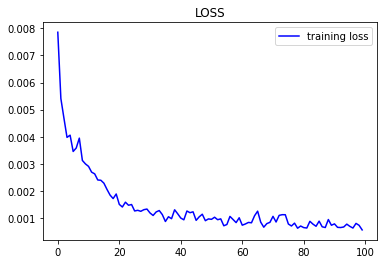

In [16]:
import matplotlib.pyplot as plt

plt.plot(his.epoch, his.loss,"b-", label="training loss")
# plt.plot(his.epoch, his.val_loss,"r-", label="validation loss")
plt.title('LOSS')
plt.legend()
plt.show()

In [ ]:
model.save('/content/weight.h5')

In [ ]:
!mv /content/weight.h5 /content/gdrive/MyDrive/Colab_Notebooks

#4. Testing

#4.1. Predict from real data

In [17]:
# Getting the predicted 
df_test = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/DOGE_TEST.csv')
testing_set=df_test.filter(['Close'])
training_set = df.filter(['Close'])
training_set = df.iloc[:num_train, 4:5]
print(testing_set.shape)
print(training_set.shape)
# real_stock_prices = testing_set['Close'].values
# print(real_stock_prices.shape)
total_dataset = pd.concat((training_set['Close'],testing_set['Close']), axis = 0)
inputs = total_dataset[len(total_dataset) - len(training_set) - 60:].values
inputs = inputs.reshape(-1,1)
# inputs = sc.transform(inputs)
print(inputs.shape)

(366, 1)
(1032, 1)
(1092, 1)


(1032, 60, 1)
(365,)


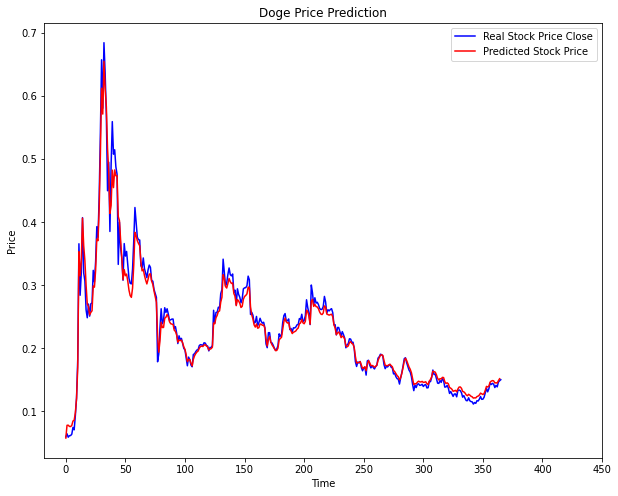

In [19]:
X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, :])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# model = keras.models.load_model('/content/gdrive/MyDrive/Colab_Notebooks/weight.h5')
# Predict from real data
# Re-scale values from datasets
# model.load_weights('/content/gdrive/MyDrive/Colab_Notebooks/weight.h5')
# Evaluate the model
# loss, acc = model.evaluate(X_test, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100 * acc))
predicted_stock_price = model.predict(X_test)
# testing_set = sc.inverse_transform(testing_set)
print(predicted_stock_price[667:,0].shape)
# Visualising the results
plt.figure(figsize=(10,8))
# plt.plot(training_set, 'b-', label = 'Real Stock Price Close')
plt.plot(testing_set, 'b-', label = 'Real Stock Price Close')
plt.plot(predicted_stock_price[667:,0], 'r-', label = 'Predicted Stock Price')
plt.xticks(np.arange(0,num_validation,50))
plt.title('Doge Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

#4.2. Self Prediction

MAPE: 0.09827161639605701



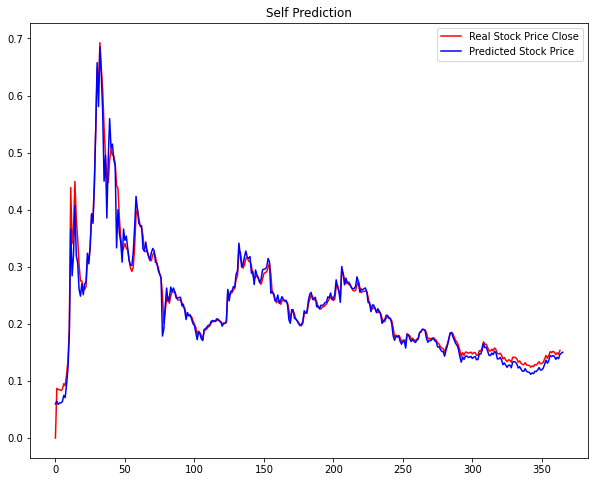

In [20]:
#Self prediction
y_predict = np.array(predicted_stock_price[668:,0])
y_actual = np.array(testing_set)
y_t = np.zeros((len(y_predict),1))
loss = []
for i in range(1,len(y_predict)):
    e = np.abs(y_actual[i-1]-y_predict[i-1])
    loss.append(e)
    y_t[i] = y_predict[i-1] + 0.5*e
MAPE = np.abs((y_actual[:365,]-y_predict)).mean()
print("MAPE: {}\n".format(MAPE))
plt.figure(figsize=(10,8))
plt.plot(y_t,'r', label='Real Stock Price Close')
plt.plot(y_actual,'b', label='Predicted Stock Price')
plt.title("Self Prediction")
plt.legend()
plt.show()

#Trend Prediction

In [ ]:
y_t.shape

(364, 1)

In [21]:
#Predicted Trend
from re import A
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

window_size = 7
x = [i for i,_ in enumerate(y_t[:,0])]
y = y_t[:,0]
slope, interpret, r_value, p_value, std_err = [], [], [], [], []
for i in range(0, y.shape[0] - window_size):
  slope1, interpret1, r_value1, p_value1, std_err1 = linregress(x[i:i+window_size+1], y[i:i+window_size+1])
  slope.append(slope1)
  interpret.append(interpret1)
  r_value.append(r_value1)
  p_value.append(p_value1)
  std_err.append(std_err1)
# slope, interpret, r_value, p_value, std_err = linregress(x[0:50], y[0:50])
# print(slope)
# slope1, interpret1, r_value1, p_value1, std_err1 = linregress(x[50:100], y[50:100])
# slope2, interpret2, r_value2, p_value2, std_err2 = linregress(x[100:150], y[100:150])
# slope3, interpret3, r_value3, p_value3, std_err3 = linregress(x[150:200], y[150:200])
# slope4, interpret4, r_value4, p_value4, std_err4 = linregress(x[200:250], y[200:250])
# slope5, interpret5, r_value5, p_value5, std_err5 = linregress(x[250:300], y[250:300])
# slope6, interpret6, r_value6, p_value6, std_err6 = linregress(x[300:350], y[300:350])
# slope7, interpret7, r_value7, p_value7, std_err7 = linregress(x[350:], y[350:])

In [ ]:
y_actual[:364,0].shape

(364,)

In [22]:
#Real Trend
from re import A
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

window_size = 7
x1 = [i for i,_ in enumerate(y_actual[:364,0])]
y1 = y_actual[:364,0]
slope2, interpret2, r_value2, p_value2, std_err2 = [], [], [], [], []
for i in range(0, y1.shape[0] - window_size):
  slope3, interpret3, r_value3, p_value3, std_err3 = linregress(x1[i:i+window_size+1], y1[i:i+window_size+1])
  slope2.append(slope3)
  interpret2.append(interpret3)
  r_value2.append(r_value3)
  p_value2.append(p_value3)
  std_err2.append(std_err3)

In [ ]:
print(np.array(slope).shape)
print(np.array(slope2).shape)
print(y_t[:,0].shape)
print(y_actual[:364,0].shape)

(357,)
(357,)
(364,)
(364,)


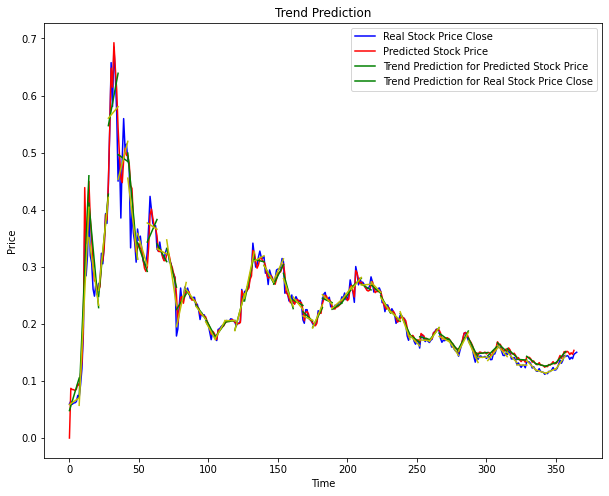

In [27]:
from IPython.display import clear_output
plt.figure(figsize=(10,8))
plt.plot(y_actual, 'b-')
# plt.plot(y_actual, 'b-')
plt.plot(y_t, 'r-')
for i in range(0, y_t.shape[0] - window_size, window_size):
  plt.plot(x[i:i+window_size+1], np.asarray(slope[i]) * x[i:i+window_size+1] + np.asarray(interpret[i]), 'g-')
for j in range(0, y_actual.shape[0] - window_size - 2, window_size):
  plt.plot(x1[j:j+window_size+1], np.asarray(slope2[j]) * x1[j:j+window_size+1] + np.asarray(interpret2[j]), 'y-')
# plt.plot(x[50:100], np.asarray(slope1) * x[50:100] + np.asarray(interpret1), 'g-')
# plt.plot(x[100:150], np.asarray(slope2) * x[100:150] + np.asarray(interpret2), 'g-')
# plt.plot(x[150:200], np.asarray(slope3) * x[150:200] + np.asarray(interpret3), 'g-')
# plt.plot(x[200:250], np.asarray(slope4) * x[200:250] + np.asarray(interpret4), 'g-')
# plt.plot(x[250:350], np.asarray(slope5) * x[250:350] + np.asarray(interpret5), 'g-')
# plt.plot(x[300:350], np.asarray(slope6) * x[300:350] + np.asarray(interpret6), 'g-')
# plt.plot(x[350:], np.asarray(slope7) * x[350:] + np.asarray(interpret7), 'g-')
# plt.xticks(np.arange(0,num_test,50))
plt.title('Trend Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Real Stock Price Close', 'Predicted Stock Price','Trend Prediction for Predicted Stock Price', 'Trend Prediction for Real Stock Price Close'])
plt.show()

In [ ]:
!pip install pytorch_model_summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
testing_set[:357].shape

(357, 1)

In [ ]:
predicted_stock_price[675:].shape

(357, 1)

In [ ]:
slope = np.array(slope)
slope = np.reshape(slope, (-1,1))
error_stock_price = predicted_stock_price[669:] - testing_set[:357]
state_size = np.append(slope, error_stock_price)
state = state_size.reshape(357,2)

(357, 1)

In [ ]:
slope = np.array(slope)
slope = np.reshape(slope, (-1,1))
print(slope.shape)
print(testing_set[:357].shape)
print(predicted_stock_price[675:].shape)
error_stock_price = predicted_stock_price[675:] - testing_set[:357]
state_size = np.append(slope, error_stock_price)
state = state_size.reshape(357,2)
print(state[356])
# predicted_stock_price1 = np.reshape(predicted_stock_price[670:,0], (362,1))
# print(predicted_stock_price1.shape)
# error_stock_price = predicted_stock_price[670:,0] - testing_set[:362]

(357, 1)
(357, 1)
(357, 1)
[0.01431753 0.00820845]


In [ ]:
slope = np.array(slope)
slope = np.reshape(slope, (-1,1))
error_stock_price = predicted_stock_price[675:] - testing_set[:357]
state_size = np.append(slope, error_stock_price)
state = state_size.reshape(357,2)
print(state.shape)
#Real Slope
slope2 = np.array(slope2)
slope2 = np.reshape(slope2, (-1,1))
state_size_actual = np.append(slope2, error_stock_price)
state_actual = state_size_actual.reshape(357,2)
print(state_actual.shape)

(357, 2)
(357, 2)


In [ ]:
!CUDA_LAUNCH_BLOCKING=1

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
import torch
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import gym
import matplotlib.pyplot as plt
from gym import wrappers
import numpy as np
import pytorch_model_summary as pms
from IPython.display import clear_output
from tabulate import tabulate
def plotLearning(x, scores, epsilons, filename, lines=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, label="1")
    ax2 = fig.add_subplot(111, label="2", frame_on=False)

    ax.plot(x, epsilons, color="C0")
    ax.set_xlabel("Day", color="C0")
    ax.set_ylabel("Epsilon", color="C0")
    ax.tick_params(axis='x', colors="C0")
    ax.tick_params(axis='y', colors="C0")

    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
        running_avg[t] = np.mean(scores[max(0, t - 20):(t + 1)])
    ax2.scatter(x, running_avg, color="C1")
    # ax2.xaxis.tick_top()
    ax2.axes.get_xaxis().set_visible(False)
    ax2.yaxis.tick_right()
    # ax2.set_xlabel('x label 2', color="C1")
    ax2.set_ylabel('Score', color="C1")
    # ax2.xaxis.set_label_position('top')
    ax2.yaxis.set_label_position('right')
    # ax2.tick_params(axis='x', colors="C1")
    ax2.tick_params(axis='y', colors="C1")

    if lines is not None:
        for line in lines:
            plt.axvline(x=line)

    plt.savefig(filename)


class DeepQNetwork(nn.Module):
    def __init__(self, lr, input_dims, fc1_dims, fc2_dims,
                 n_actions):
        super(DeepQNetwork, self).__init__()
        self.input_dims = input_dims
        self.fc1_dims = fc1_dims
        self.fc2_dims = fc2_dims
        self.n_actions = n_actions
        self.fc1 = nn.Linear(*self.input_dims, self.fc1_dims)
        self.fc2 = nn.Linear(self.fc1_dims, self.fc2_dims)
        self.fc3 = nn.Linear(self.fc2_dims, self.n_actions)

        self.optimizer = optim.Adam(self.parameters(), lr=lr)
        self.loss = nn.MSELoss()
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.to(self.device)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        actions = self.fc3(x)

        return actions


class Agent:
    def __init__(self, gamma, epsilon, lr, input_dims, batch_size, n_actions, open_price_real, close_price_predicted,
                 max_mem_size=100000, eps_end=0.05, eps_dec=5e-4):
        self.gamma = gamma
        self.epsilon = epsilon
        self.eps_min = eps_end
        self.eps_dec = eps_dec
        self.lr = lr
        self.action_space = [i for i in range(n_actions)]
        self.mem_size = max_mem_size
        self.batch_size = batch_size
        self.CRV = 100
        self.mem_cntr = 0
        self.iter_cntr = 0
        self.replace_target = 100
        self.open_price_real = open_price_real
        self.close_price_predicted = close_price_predicted
        self.Q_eval = DeepQNetwork(lr, n_actions=n_actions,
                                   input_dims=input_dims,
                                   fc1_dims=256, fc2_dims=128)
        self.state_memory = np.zeros((self.mem_size, *input_dims),
                                     dtype=np.float32)
        self.new_state_memory = np.zeros((self.mem_size, *input_dims),
                                         dtype=np.float32)
        self.action_memory = np.zeros(self.mem_size, dtype=np.int32)
        self.reward_memory = np.zeros(self.mem_size, dtype=np.float32)
        self.terminal_memory = np.zeros(self.mem_size, dtype=np.bool)
        self.q_value_store = []
    def store_transition(self, state, action, reward, state_, terminal):
        index = self.mem_cntr % self.mem_size
        self.state_memory[index] = state
        self.new_state_memory[index] = state_
        self.reward_memory[index] = reward
        self.action_memory[index] = action
        self.terminal_memory[index] = terminal
        self.mem_cntr += 1

    def choose_action(self, observation):
        if np.random.random() > self.epsilon:
            state = T.tensor([observation.tolist()]).to(self.Q_eval.device)
            actions = self.Q_eval.forward(state)
            action = T.argmax(actions).item()
        else:
            action = np.random.choice(self.action_space)

        return action
    def Ns(self):
        return np.round(self.CRV / self.open_price_real)
    def TP(self):
        return 0.5*np.abs(self.close_price_predicted - self.open_price_real) * self.Ns

    def learn(self):
        if self.mem_cntr < self.batch_size:
            return

        self.Q_eval.optimizer.zero_grad()

        max_mem = min(self.mem_cntr, self.mem_size)

        batch = np.random.choice(max_mem, self.batch_size, replace=False)
        batch_index = np.arange(self.batch_size, dtype=np.int32)

        state_batch = T.tensor(self.state_memory[batch]).to(self.Q_eval.device)
        new_state_batch = T.tensor(
            self.new_state_memory[batch]).to(self.Q_eval.device)
        action_batch = self.action_memory[batch]
        reward_batch = T.tensor(
            self.reward_memory[batch]).to(self.Q_eval.device)
        terminal_batch = T.tensor(
            self.terminal_memory[batch]).to(self.Q_eval.device)

        q_eval = self.Q_eval.forward(state_batch)[batch_index, action_batch]
        q_next = self.Q_eval.forward(new_state_batch)
        q_next[terminal_batch] = 0.0
        q_target = reward_batch + self.gamma * T.max(q_next, dim=1)[0]
        self.q_value_store.append(q_target.mean())
        loss = self.Q_eval.loss(q_target, q_eval).to(self.Q_eval.device)
        loss.backward()
        self.Q_eval.optimizer.step()

        self.iter_cntr += 1
        self.epsilon = self.epsilon - self.eps_dec \
            if self.epsilon > self.eps_min else self.eps_min
def sigmoid(x):
  return 1/(1+np.exp(-x))
def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A
if __name__ == '__main__':
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    open_price_real = df.filter(['Open']).values
    open_price_real[:357].reshape(357,)
    close_price_predicted = predicted_stock_price[:,0]
    # env = gym.make('LunarLander-v2')
    model = DeepQNetwork(lr=1e-3, n_actions=3, input_dims=[2], fc1_dims=128, fc2_dims=128)
    print("=========================DEEP O-NETWORK PARAMETERS==========================")
    pms.summary(model, torch.zeros([1, 2], device=device), show_input=False, show_hierarchical=True, print_summary=True)
    print("============================================================================")
    agent = Agent(gamma=0.99, epsilon=1.0, batch_size=64, n_actions=3, eps_end=0.01,
                  input_dims=[2], lr=1e-6, open_price_real = open_price_real, close_price_predicted = close_price_predicted)
    scores, eps_history = [], []
    episode_count = 100
    #Predicted Slope
    slope = np.array(slope)
    slope = np.reshape(slope, (-1,1))
    error_stock_price = predicted_stock_price[675:] - testing_set[:357]
    state_size = np.append(slope, error_stock_price)
    state = state_size.reshape(357,2)
    #Real Slope
    slope2 = np.array(slope2)
    slope2 = np.reshape(slope2, (-1,1))
    state_size_actual = np.append(slope2, error_stock_price)
    state_actual = state_size_actual.reshape(357,2)
    #Initialize data
    action_data_test = []
    action_store = []
    q_value_store = []
    num_correct = 0
    accuracy = []
    reward_store = []
    num_correct_store = []
    reward_total = 0
    reward_arr = []
    num_correct_reward = 0
    for i in range(episode_count):
      score = 0
      done = False
      observation = state[0]
      observation_actual = state_actual[0]
      j=0
      while not done:
          action = agent.choose_action(observation)
          action_actual = agent.choose_action(observation_actual)
          observation_ = state[j+1]
          observation_actual_ = state_actual[j+1]
          #Take profit
          Ns = np.round(100 / open_price_real[0])
          reward = 0.5 * np.abs(close_price_predicted[i] - open_price_real[0]) * Ns
          num_correct = action==action_actual #one-hot technique
          num_correct_store.append(num_correct)
          done = False
          agent.store_transition(observation, action, reward, observation_, done)
          agent.store_transition(observation_actual, action_actual, reward, observation_actual_, done)
          agent.learn()          
          observation = observation_
          observation_actual = observation_actual_
          reward_total += reward.mean()
          # reward_arr.append(reward)
          j = j + 1
          if j >= 356:
              done = True
              # reward = reward.mean()
      reward_arr.append(reward_total)
      reward_store.append(reward)
      # num_correct_reward = max(reward_store)[0] / reward_total
      num_correct_reward = max(reward_store)[0] / np.sum(reward_store)
      # num_correct = np.sum(num_correct_store) / len(num_correct_store)
      # num_correct = np.max(num_correct, 0)
      q_value_store.append(agent.epsilon)
      # reward = float(reward[0])
      # reward_store.append(reward)
      # reward = (reward_store[i] + reward_store[i+1]) / 2
      clear_output(wait=True)
      table = ['Episode', 'Epsilon', 'Action', 'Reward', 'Accuracy Reward']
      if action == 1:
          headers = [[str(i+1) + "/" + str(episode_count), agent.epsilon, 'Buy', reward, '{:.2f}'.format(num_correct_reward*100) + " %"]]
      elif action == 2:
          headers = [[str(i+1) + "/" + str(episode_count), agent.epsilon, 'Sell', reward, '{:.2f}'.format(num_correct_reward*100) + " %"]]
      else:
          headers = [[str(i+1) + "/" + str(episode_count), agent.epsilon, 'Hold', reward, '{:.2f}'.format(num_correct_reward*100) + " %"]]
      print(tabulate(headers, table, tablefmt="psql"))
      accuracy.append(num_correct_reward)
      # reward_store.append(reward)
      action_store.append(action)
      fig, axes = plt.subplots(2, 2,figsize=(30,15))
      axes[0,0].plot([i for i,_ in enumerate(accuracy)], accuracy, 'go')
      axes[0,0].set_title("Tested Action")
      axes[0,0].set_xlabel("Episode")
      axes[0,0].set_ylabel("Accuracy")
      axes[0,1].plot([i for i,_ in enumerate(q_value_store)], q_value_store, 'r-')
      axes[0,1].set_title("Epsilon Fluctuation")
      axes[0,1].set_xlabel("Episode")
      axes[0,1].set_ylabel("Epsilon")
      axes[1,0].plot([i for i,_ in enumerate(reward_store)], reward_store, 'm-', marker='^')
      axes[1,0].set_title("Profit")
      axes[1,0].set_xlabel("Episode")
      axes[1,0].set_ylabel("Reward")
      axes[1,1].plot([i for i,_ in enumerate(reward_store)], reward_store, 'm-')
      if action_store[i] == 1:
        axes[1,1].plot(i, reward,marker='>', markerfacecolor = 'r',label='Buy',markersize=12)
      elif action_store[i] == 2:
        axes[1,1].plot(i, reward,marker='<', markerfacecolor='g', label='Sell',markersize=12)
      else:
        axes[1,1].plot(i, reward,marker='o', markerfacecolor='k', label='Hold',markersize=12)
      axes[1,1].set_title("Profit and Predicted Action")
      axes[1,1].set_xlabel("Episode")
      axes[1,1].set_ylabel("Reward")
      axes[1,1].legend(loc='best')
      axes = axes.flatten()
      plt.show()
    filename = '/content/reward.png'
    plt.savefig(filename)
    torch.save(model.state_dict(), '/content/my_checkpoint.h5')
    # plotLearning(x, scores, eps_history, filename)

+-----------+-----------+----------+----------+-------------------+
| Episode   |   Epsilon | Action   |   Reward | Accuracy Action   |
|-----------+-----------+----------+----------+-------------------|
| 100/100   |      0.01 | Hold     |  276.101 | 89.03 %           |
+-----------+-----------+----------+----------+-------------------+


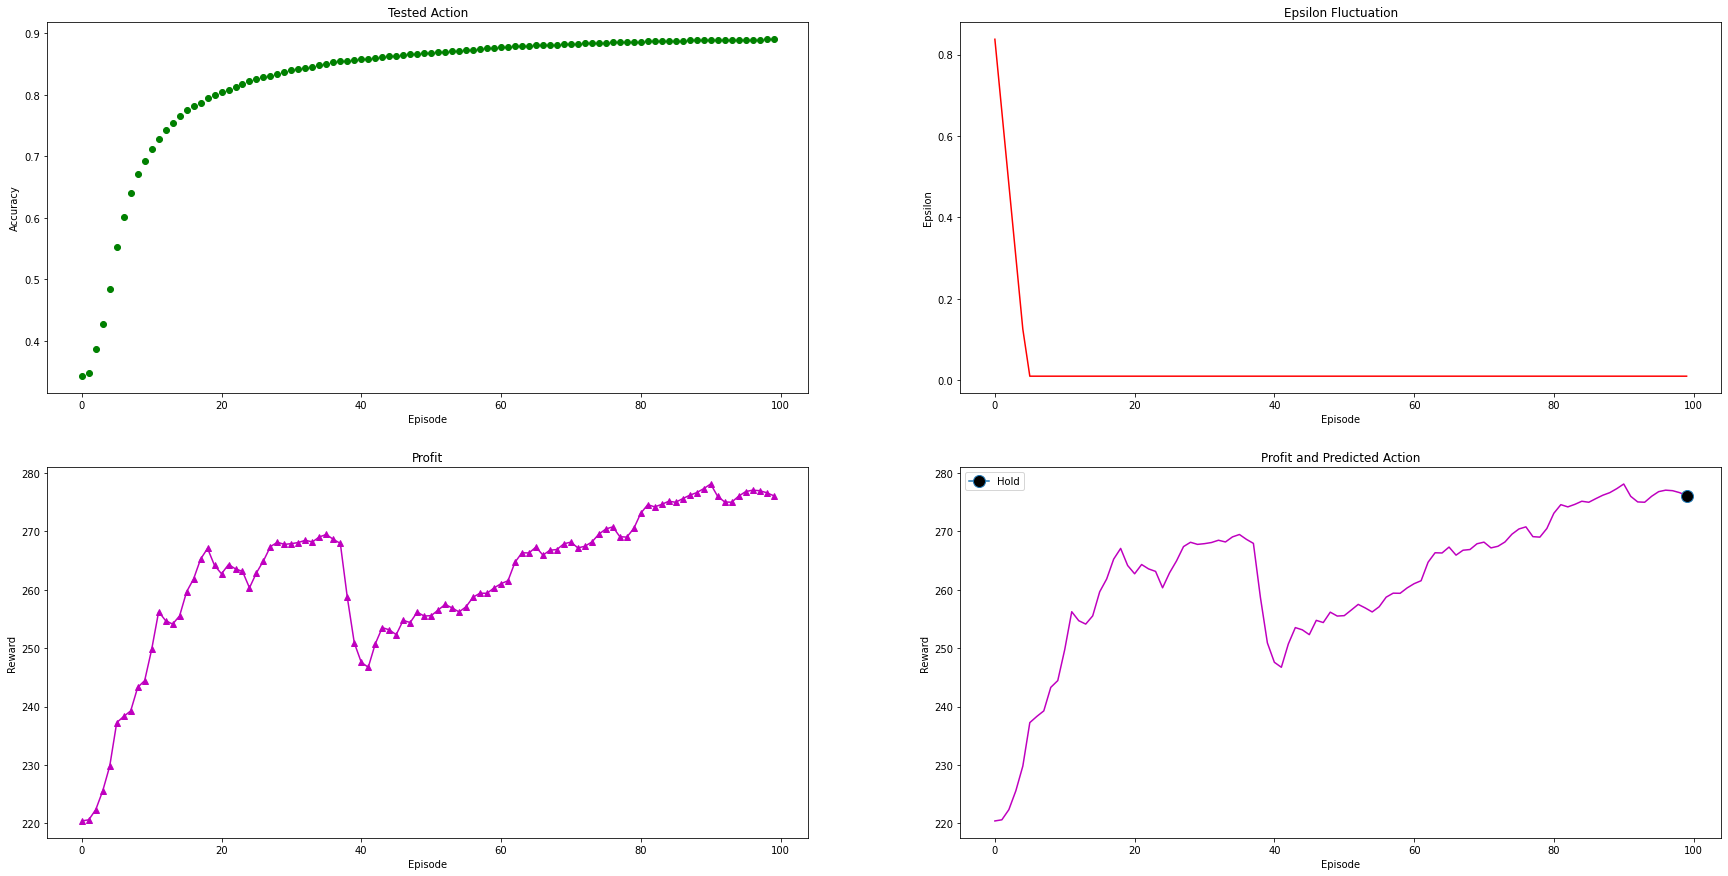

<Figure size 432x288 with 0 Axes>

In [ ]:
import torch
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import gym
import matplotlib.pyplot as plt
from gym import wrappers
import numpy as np
import pytorch_model_summary as pms
from IPython.display import clear_output
from tabulate import tabulate
def plotLearning(x, scores, epsilons, filename, lines=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, label="1")
    ax2 = fig.add_subplot(111, label="2", frame_on=False)

    ax.plot(x, epsilons, color="C0")
    ax.set_xlabel("Day", color="C0")
    ax.set_ylabel("Epsilon", color="C0")
    ax.tick_params(axis='x', colors="C0")
    ax.tick_params(axis='y', colors="C0")

    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
        running_avg[t] = np.mean(scores[max(0, t - 20):(t + 1)])
    ax2.scatter(x, running_avg, color="C1")
    # ax2.xaxis.tick_top()
    ax2.axes.get_xaxis().set_visible(False)
    ax2.yaxis.tick_right()
    # ax2.set_xlabel('x label 2', color="C1")
    ax2.set_ylabel('Score', color="C1")
    # ax2.xaxis.set_label_position('top')
    ax2.yaxis.set_label_position('right')
    # ax2.tick_params(axis='x', colors="C1")
    ax2.tick_params(axis='y', colors="C1")

    if lines is not None:
        for line in lines:
            plt.axvline(x=line)

    plt.savefig(filename)


class DeepQNetwork(nn.Module):
    def __init__(self, lr, input_dims, fc1_dims, fc2_dims,
                 n_actions):
        super(DeepQNetwork, self).__init__()
        self.input_dims = input_dims
        self.fc1_dims = fc1_dims
        self.fc2_dims = fc2_dims
        self.n_actions = n_actions
        self.fc1 = nn.Linear(*self.input_dims, self.fc1_dims)
        self.fc2 = nn.Linear(self.fc1_dims, self.fc2_dims)
        self.fc3 = nn.Linear(self.fc2_dims, self.n_actions)

        self.optimizer = optim.Adam(self.parameters(), lr=lr)
        self.loss = nn.MSELoss()
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.to(self.device)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        actions = self.fc3(x)

        return actions


class Agent:
    def __init__(self, gamma, epsilon, lr, input_dims, batch_size, n_actions, open_price_real, close_price_predicted,
                 max_mem_size=100000, eps_end=0.05, eps_dec=5e-4):
        self.gamma = gamma
        self.epsilon = epsilon
        self.eps_min = eps_end
        self.eps_dec = eps_dec
        self.lr = lr
        self.action_space = [i for i in range(n_actions)]
        self.mem_size = max_mem_size
        self.batch_size = batch_size
        self.CRV = 100
        self.mem_cntr = 0
        self.iter_cntr = 0
        self.replace_target = 100
        self.open_price_real = open_price_real
        self.close_price_predicted = close_price_predicted
        self.Q_eval = DeepQNetwork(lr, n_actions=n_actions,
                                   input_dims=input_dims,
                                   fc1_dims=256, fc2_dims=128)
        self.state_memory = np.zeros((self.mem_size, *input_dims),
                                     dtype=np.float32)
        self.new_state_memory = np.zeros((self.mem_size, *input_dims),
                                         dtype=np.float32)
        self.action_memory = np.zeros(self.mem_size, dtype=np.int32)
        self.reward_memory = np.zeros(self.mem_size, dtype=np.float32)
        self.terminal_memory = np.zeros(self.mem_size, dtype=np.bool)
        self.q_value_store = []
    def store_transition(self, state, action, reward, state_, terminal):
        index = self.mem_cntr % self.mem_size
        self.state_memory[index] = state
        self.new_state_memory[index] = state_
        self.reward_memory[index] = reward
        self.action_memory[index] = action
        self.terminal_memory[index] = terminal
        self.mem_cntr += 1

    def choose_action(self, observation):
        if np.random.random() > self.epsilon:
            state = T.tensor([observation.tolist()]).to(self.Q_eval.device)
            actions = self.Q_eval.forward(state)
            action = T.argmax(actions).item()
        else:
            action = np.random.choice(self.action_space)

        return action
    def Ns(self):
        return np.round(self.CRV / self.open_price_real)
    def TP(self):
        return 0.5*np.abs(self.close_price_predicted - self.open_price_real) * self.Ns

    def learn(self):
        if self.mem_cntr < self.batch_size:
            return

        self.Q_eval.optimizer.zero_grad()

        max_mem = min(self.mem_cntr, self.mem_size)

        batch = np.random.choice(max_mem, self.batch_size, replace=False)
        batch_index = np.arange(self.batch_size, dtype=np.int32)

        state_batch = T.tensor(self.state_memory[batch]).to(self.Q_eval.device)
        new_state_batch = T.tensor(
            self.new_state_memory[batch]).to(self.Q_eval.device)
        action_batch = self.action_memory[batch]
        reward_batch = T.tensor(
            self.reward_memory[batch]).to(self.Q_eval.device)
        terminal_batch = T.tensor(
            self.terminal_memory[batch]).to(self.Q_eval.device)

        q_eval = self.Q_eval.forward(state_batch)[batch_index, action_batch]
        q_next = self.Q_eval.forward(new_state_batch)
        q_next[terminal_batch] = 0.0
        q_target = reward_batch + self.gamma * T.max(q_next, dim=1)[0]
        self.q_value_store.append(q_target.mean())
        loss = self.Q_eval.loss(q_target, q_eval).to(self.Q_eval.device)
        loss.backward()
        self.Q_eval.optimizer.step()

        self.iter_cntr += 1
        self.epsilon = self.epsilon - self.eps_dec \
            if self.epsilon > self.eps_min else self.eps_min
def sigmoid(x):
  return 1/(1+np.exp(-x))
def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A
if __name__ == '__main__':
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    open_price_real = df.filter(['Open']).values
    open_price_real[:357].reshape(357,)
    close_price_predicted = predicted_stock_price[:,0]
    # env = gym.make('LunarLander-v2')
    model = DeepQNetwork(lr=1e-3, n_actions=3, input_dims=[2], fc1_dims=128, fc2_dims=128)
    print("=========================DEEP O-NETWORK PARAMETERS==========================")
    pms.summary(model, torch.zeros([1, 2], device=device), show_input=False, show_hierarchical=True, print_summary=True)
    print("============================================================================")
    agent = Agent(gamma=0.99, epsilon=1.0, batch_size=64, n_actions=3, eps_end=0.01,
                  input_dims=[2], lr=1e-6, open_price_real = open_price_real, close_price_predicted = close_price_predicted)
    scores, eps_history = [], []
    episode_count = 100
    #Predicted Slope
    slope = np.array(slope)
    slope = np.reshape(slope, (-1,1))
    error_stock_price = predicted_stock_price[675:] - testing_set[:357]
    state_size = np.append(slope, error_stock_price)
    state = state_size.reshape(357,2)
    #Real Slope
    slope2 = np.array(slope2)
    slope2 = np.reshape(slope2, (-1,1))
    state_size_actual = np.append(slope2, error_stock_price)
    state_actual = state_size_actual.reshape(357,2)
    #Initialize data
    action_data_test = []
    action_store = []
    q_value_store = []
    num_correct = 0
    accuracy = []
    reward_store = []
    num_correct_store = []
    reward_total = 0
    reward_arr = []
    num_correct_reward = 0
    for i in range(episode_count):
      score = 0
      done = False
      observation = state[0]
      observation_actual = state_actual[0]
      j=0
      while not done:
          action = agent.choose_action(observation)
          action_actual = agent.choose_action(observation_actual)
          observation_ = state[j+1]
          observation_actual_ = state_actual[j+1]
          #Take profit
          Ns = np.round(100 / open_price_real[0])
          reward = 0.5 * np.abs(close_price_predicted[i] - open_price_real[0]) * Ns
          num_correct = action==action_actual #one-hot technique
          num_correct_store.append(num_correct)
          done = False
          agent.store_transition(observation, action, reward, observation_, done)
          agent.store_transition(observation_actual, action_actual, reward, observation_actual_, done)
          agent.learn()          
          observation = observation_
          observation_actual = observation_actual_
          reward_total += reward.mean()
          # reward_arr.append(reward)
          j = j + 1
          if j >= 356:
              done = True
              reward = reward.mean()
      reward_arr.append(reward_total)
      reward_store.append(reward)
      # num_correct_reward = max(reward_store)[0] / reward_total
      # num_correct_reward = np.sum(reward_store) / len(reward_store)
      num_correct = np.sum(num_correct_store) / len(num_correct_store)
      num_correct = np.max(num_correct, 0)
      q_value_store.append(agent.epsilon)
      # reward = float(reward[0])
      # reward_store.append(reward)
      # reward = (reward_store[i] + reward_store[i+1]) / 2
      clear_output(wait=True)
      table = ['Episode', 'Epsilon', 'Action', 'Reward', 'Accuracy Action']
      if action == 1:
          headers = [[str(i+1) + "/" + str(episode_count), agent.epsilon, 'Buy', reward, '{:.2f}'.format(num_correct*100) + " %"]]
      elif action == 2:
          headers = [[str(i+1) + "/" + str(episode_count), agent.epsilon, 'Sell', reward, '{:.2f}'.format(num_correct*100) + " %"]]
      else:
          headers = [[str(i+1) + "/" + str(episode_count), agent.epsilon, 'Hold', reward, '{:.2f}'.format(num_correct*100) + " %"]]
      print(tabulate(headers, table, tablefmt="psql"))
      accuracy.append(num_correct)
      # reward_store.append(reward)
      action_store.append(action)
      fig, axes = plt.subplots(2, 2,figsize=(30,15))
      axes[0,0].plot([i for i,_ in enumerate(accuracy)], accuracy, 'go')
      axes[0,0].set_title("Tested Action")
      axes[0,0].set_xlabel("Episode")
      axes[0,0].set_ylabel("Accuracy")
      axes[0,1].plot([i for i,_ in enumerate(q_value_store)], q_value_store, 'r-')
      axes[0,1].set_title("Epsilon Fluctuation")
      axes[0,1].set_xlabel("Episode")
      axes[0,1].set_ylabel("Epsilon")
      axes[1,0].plot([i for i,_ in enumerate(reward_store)], reward_store, 'm-', marker='^')
      axes[1,0].set_title("Profit")
      axes[1,0].set_xlabel("Episode")
      axes[1,0].set_ylabel("Reward")
      axes[1,1].plot([i for i,_ in enumerate(reward_store)], reward_store, 'm-')
      if action_store[i] == 1:
        axes[1,1].plot(i, reward,marker='>', markerfacecolor = 'r',label='Buy',markersize=12)
      elif action_store[i] == 2:
        axes[1,1].plot(i, reward,marker='<', markerfacecolor='g', label='Sell',markersize=12)
      else:
        axes[1,1].plot(i, reward,marker='o', markerfacecolor='k', label='Hold',markersize=12)
      axes[1,1].set_title("Profit and Predicted Action")
      axes[1,1].set_xlabel("Episode")
      axes[1,1].set_ylabel("Reward")
      axes[1,1].legend(loc='best')
      axes = axes.flatten()
      plt.show()
    filename = '/content/reward.png'
    plt.savefig(filename)
    torch.save(model.state_dict(), '/content/my_checkpoint.h5')
    # plotLearning(x, scores, eps_history, filename)